In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('S05-hw-dataset.csv')
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [22]:
df['default'].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

In [23]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Датасет содержит 3000 объектов (клиентов) и 17 признаков, включая целевую переменную default. Все колонки имеют полное заполнение (non-null count = 3000), отсутствуют пропущенные значения.

Потенциальные аномалии в признаках debt_to_income и num_late_payments - максимальное значение (0.878343, 14) выглядит экстремальным при среднем (0.284065, 6.869)

Распределение таргета default выглядит сбалансированно: класс 0 (отсутствие дефолта) содержит 1769 объектов (59%), класс 1 (дефолт) —  1231 объект (41%).

### Train/Test-сплит и бейзлайн-модель

In [9]:
# выделим матрицу признаков X и вектор таргета y
y = df['default']
X = df.drop(columns=['client_id', 'default'])

Все признаки в датасете являются числовыми - это можно сказать из результата, полученного от функции info(), поскольку столбец Dtype содержит только численные типы (float64, int64).

Все признаки также находятся в пределах требуемых диапазонов, что видно из анализа df.describe()

In [10]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

In [11]:
# построим бейзлайн-модель на основе DummyClassifier
dm = DummyClassifier(strategy="most_frequent", random_state=19)
dm.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",19
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [60]:
y_pred_dm = dm.predict_proba(X_test)[:, 1]
# оценка Accuracy
accuracy_dm = accuracy_score(y_test, y_pred_dm)
# оценка ROC-AUC
roc_auc_dm = roc_auc_score(y_test, y_pred_dm)

print(f"Accuracy: {accuracy_dm}")
print(f"ROC-AUC:  {roc_auc_dm}")

Accuracy: 0.59
ROC-AUC:  0.5


Бейзлайн устанавливает минимально приемлемый порог качества./ Бейзлайн предсказывает только класс 0 (отсутствие дефолта) для всех объектов, полностью игнорируя класс 1. Поэтому результат accuracy_score совпадает в 59% случаев - это доля класса 0 в данных

### Логистическая регрессия и подбор гиперпараметров

In [25]:
# построение Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

In [64]:
# подбор параметра регуляризации C
c_values = [0.01, 0.1, 1.0, 10.0]

for C in c_values:
    pipe.set_params(logreg__C=C)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    print(f"C = {C}: accuracy = {score:.8f}")

C = 0.01: accuracy = 0.76666667
C = 0.1: accuracy = 0.76666667
C = 1.0: accuracy = 0.76666667
C = 10.0: accuracy = 0.76333333


Поскольку первые три итерации даеют одинаковый результат, выбираем более простой - C=0.01

In [61]:
# обучение модели с выбранным параметром C и оценка
pipe.set_params(logreg__C=0.01)
pipe.fit(X_train, y_train)
y_pred_lg = pipe.predict(X_test)
y_pred_proba_lg = pipe.predict_proba(X_test)[:, 1]

accuracy_lg = accuracy_score(y_test, y_pred_lg)
roc_auc_lg = roc_auc_score(y_test, y_pred_proba_lg)
print(f"Accuracy: {accuracy_lg}")
print(f"ROC-AUC:  {roc_auc_lg}")

Accuracy: 0.7666666666666667
ROC-AUC:  0.8368816315281797


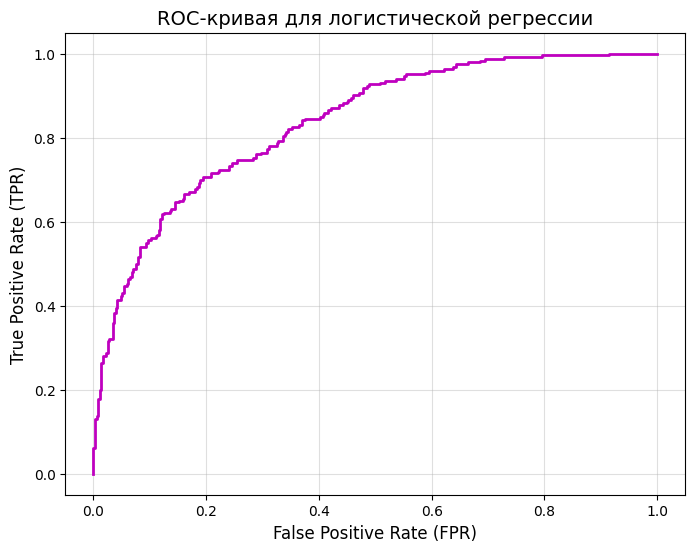

In [59]:
# построение графика ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая для логистической регрессии', fontsize=14)
plt.grid(alpha=0.4)

# сохранение графика
plt.savefig('figures/roc.png')

In [63]:
# cравнение бейзлайна и логистической регрессии
results = pd.DataFrame({
    'Model': ['Baseline (Most Frequent)', 'Logistic Regression (C=0.01)'],
    'Accuracy': [accuracy_dm, accuracy_lg],
    'ROC-AUC': [roc_auc_dm, roc_auc_lg]})

results

,Model,Accuracy,ROC-AUC
0,Baseline (Most Frequent),0.590000,0.500000
1,Logistic Regression (C=0.01),0.766667,0.836882


Бейзлайн показал базовый уровень Accuracy - 0.59, но его ROC-AUC ожидаемо составил 0.5, так как он не способен ранжировать объекты. Логистическая регрессия значительно улучшила качество: Accuracy выросла до 0.767, а ROC-AUC достиг уверенного уровня 0.837, что подтверждает способность модели находить реальные зависимости в данных.

Итого Accuracy выросла на ~0.177, а ROC-AUC - на 0.337, что являеься гораздо более высоким результатом. 

При изменении параметра C регуляризации можно было наблюдать, что метрика Accuracy стала падать при достижении значения С=10, что говорит о том, что при сильном ослаблении регуляризации точность модели падает из-за переобучения.

В результате сравнения можно сделать вывод, что наиболее подходящей является модель логистической регрессии, поскольку показывает более высокий результат.